To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 1 - Algorithmic Performance Scaling

## 1.1

**Link to dataset:**

Number of features: 42
Number of instances: 67557
Number of classes: 3
Number of numerical features: 0
Number of categorical features: 42


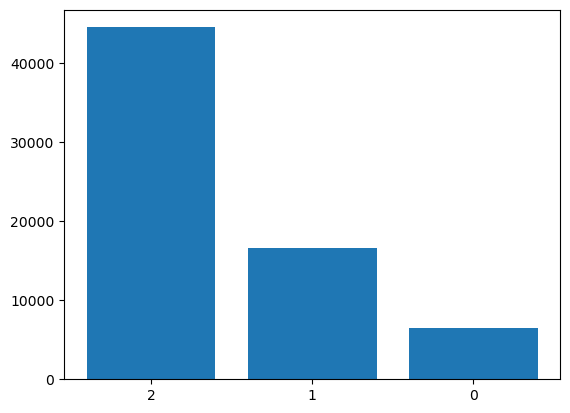

In [1]:
# your code starts here
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

# dataset = fetch_openml(name = 'walking-activity', parser='auto')
dataset = fetch_openml(data_id=40668, parser='auto')

print("Number of features:", len(dataset.feature_names))
print("Number of instances:", dataset.data.shape[0])
print("Number of classes:", len(pd.unique(dataset.target)))
print("Number of numerical features:", dataset.data.select_dtypes(include='number').shape[1])
print("Number of categorical features:", dataset.data.select_dtypes(include='category').shape[1])

import matplotlib.pyplot as plt

plt.bar(dataset.target.value_counts().keys(), dataset.target.value_counts())
plt.show()


**Answer:**

## 1.2

In [2]:
# your code starts here
# Store the feature data
X = dataset.data
# store the target data
y = dataset.target
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle= True)
training = {0.1 * i: [train_test_split(X_train, y_train, train_size=0.1 * i, random_state=i, shuffle=True)[j] for j in [0, 2]] for i in range(1, 10)}
training[1.0] = [X_train, y_train]

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import time

perf = []

for i in training.keys():
    entry = [i * 100]
    clf = DecisionTreeClassifier(random_state=0)
    start = time.time()
    clf = clf.fit(training[i][0], training[i][1])
    stop = time.time()
    entry += [clf.score(X_test, y_test), stop - start]
    
    clf = GradientBoostingClassifier(random_state=0)
    start = time.time()
    clf = clf.fit(training[i][0], training[i][1])
    stop = time.time()
    entry += [clf.score(X_test, y_test), stop - start]
    
    perf.append(entry)
    
from tabulate import tabulate

perf = pd.DataFrame(perf)

table = perf.copy()
table[0] = table[0].apply(lambda i: f"{i:n}")
table[1] = table[1].apply(lambda i: f'{i:.6f}')
table[3] = table[3].apply(lambda i: f'{i:.6f}')
table[2] = table[2].apply(lambda i: f'{i:.3f}')
table[4] = table[4].apply(lambda i: f'{i:.3f}')
head = ['training data %', 'Decision tree \n accuracy', 'Decision tree \ntime', 'Gradient boosting \naccuracy', 'Gradient boosting \ntime']

print(tabulate(table, headers=head, tablefmt='pretty'))


+---+-----------------+----------------+----------------+--------------------+--------------------+
|   | training data % | Decision tree  | Decision tree  | Gradient boosting  | Gradient boosting  |
|   |                 |    accuracy    |      time      |      accuracy      |        time        |
+---+-----------------+----------------+----------------+--------------------+--------------------+
| 0 |       10        |    0.659118    |     0.063      |      0.745041      |       1.871        |
| 1 |       20        |    0.671551    |     0.128      |      0.753700      |       3.806        |
| 2 |       30        |    0.686649    |     0.214      |      0.754589      |       5.674        |
| 3 |       40        |    0.703375    |     0.250      |      0.756217      |       7.780        |
| 4 |       50        |    0.710850    |     0.381      |      0.754885      |       10.087       |
| 5 |       60        |    0.710554    |     0.387      |      0.754811      |       11.590       |


**Answer:**

## 1.3

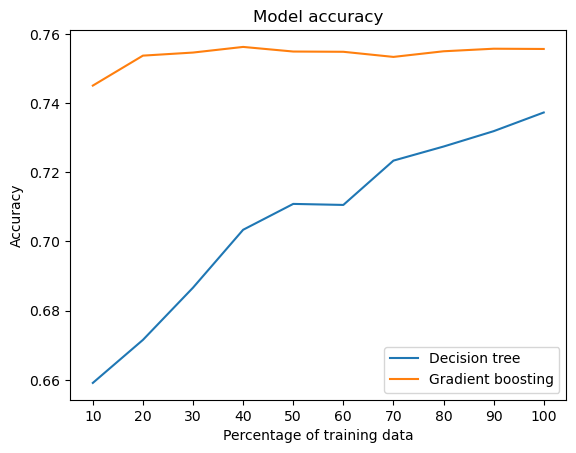

In [3]:
# your code starts here
plt.plot(perf[0].astype(int), perf[1], label='Decision tree')
plt.plot(perf[0].astype(int), perf[3], label='Gradient boosting')
plt.title('Model accuracy')
plt.xlabel('Percentage of training data')
plt.ylabel('Accuracy')
plt.xticks(perf[0].astype(int))
plt.legend()
plt.show()

**Answer:**

## 1.4

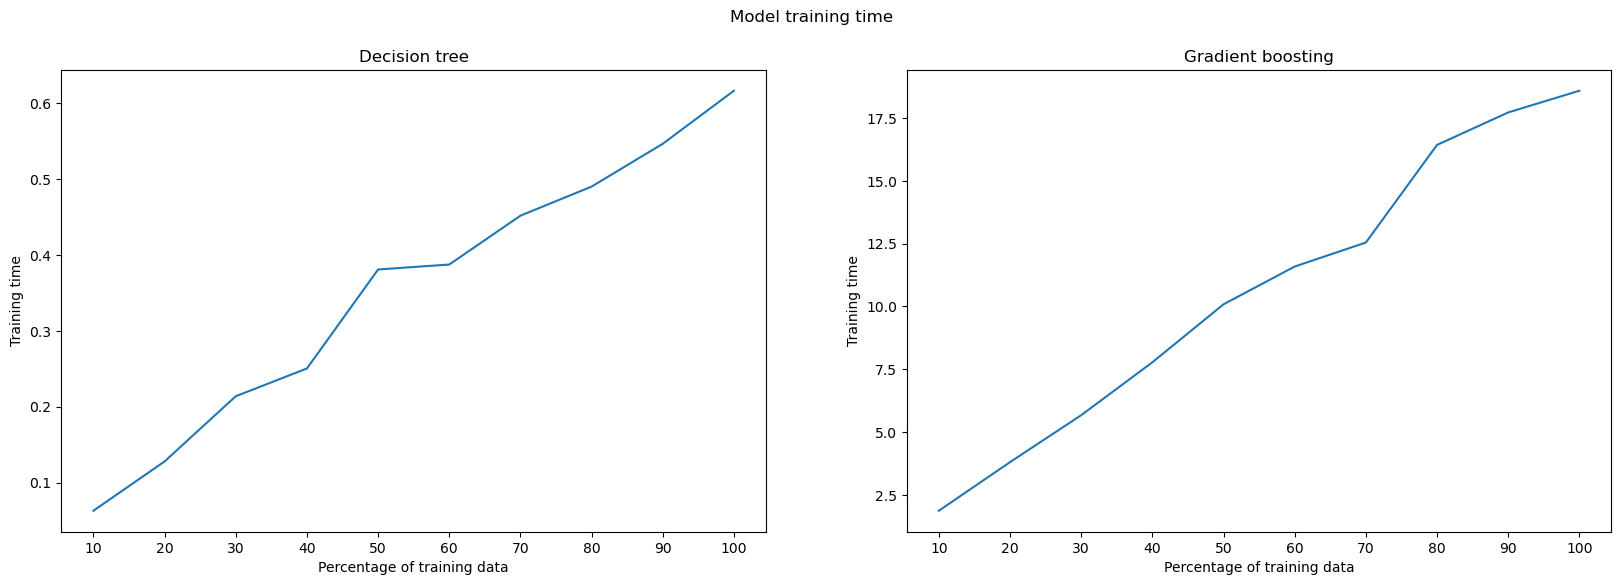

In [4]:
# your code starts here
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

plt.sca(axs[0])
plt.plot(perf[0].astype(int), perf[2])
plt.title('Decision tree')
plt.xlabel('Percentage of training data')
plt.ylabel('Training time')
plt.xticks(perf[0].astype(int))

plt.sca(axs[1])
plt.plot(perf[0].astype(int), perf[4])
plt.title('Gradient boosting')
plt.xlabel('Percentage of training data')
plt.ylabel('Training time')
plt.xticks(perf[0].astype(int))

plt.suptitle('Model training time')

plt.show()

**Answer:**

## 1.5

**Answer:**
1. Gradient boosting gives better accuracy than decision tree.
2. Decision tree has much lower training time.
3. Accuracy performance for decision tree is affected by training data percentage much more than gradient boosting, which isn't affected much.